#### Importing the Libraries

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

#### Creating a dataset

In [2]:
x, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

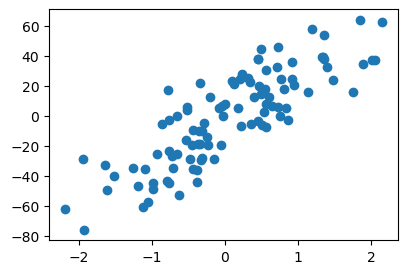

In [3]:
plt.figure(figsize = [4.5, 3])
plt.scatter(x, y)

#### Calculating intercept and slope values for Linear Regression model

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)
print(regressor.coef_)
print(regressor.intercept_)

[27.82809103]
-2.29474455867698


#### Calculating intercept and slope values for Ridge Regression model (Alpha = 10)

In [5]:
from sklearn.linear_model import Ridge
regularizer = Ridge(alpha=10)
regularizer.fit(x, y)
print(regularizer.coef_)
print(regularizer.intercept_)

[24.9546267]
-2.1269130035235735


#### Calculating intercept and slope values for Ridge Regression model (Alpha = 100)

In [6]:
regularizer2 = Ridge(alpha=100)
regularizer2.fit(x, y)
print(regularizer2.coef_)
print(regularizer2.intercept_)

[12.93442104]
-1.4248441496033308


#### Comparing all the models to visualize the differences

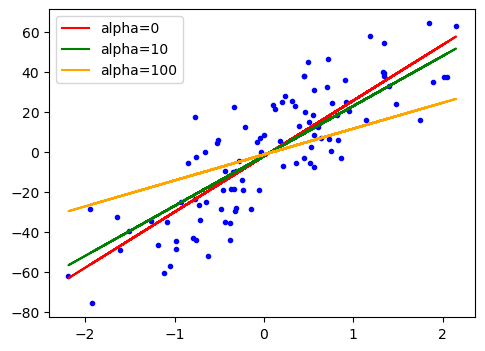

In [9]:
plt.figure(figsize = [5.5, 4])
plt.plot(x, y, 'b.')
plt.plot(x, regressor.predict(x), color='red', label='alpha=0')
plt.plot(x, regularizer.predict(x), color='green', label='alpha=10')
plt.plot(x, regularizer2.predict(x), color='orange', label='alpha=100')
plt.legend()

#### Creating our own Ridge Regression class 

In [10]:
class MyRidgeRegression:
    
    def __init__(self, alpha=0.1):
        # Constructor for MyRidgeRegression class.
        # Initializes the object with alpha and sets m and b as None.
        self.alpha = alpha
        self.m = None
        self.b = None
        
    def fit(self, x_train, y_train):
        # Fits the regression model to the training data.
        # Calculates the values of m and b.
        num = 0  # Initialize numerator variable to 0.
        den = 0  # Initialize denominator variable to 0.
        
        # Loop through each data point in the training set.
        for i in range(x_train.shape[0]):
            # Update numerator and denominator based on current data point.
            num = num + (y_train[i] - y_train.mean()) * (x_train[i] - x_train.mean())
            den = den + (x_train[i] - x_train.mean()) * (x_train[i] - x_train.mean())
        
        # Calculate the value of m (slope) using the formula: m = num / (den + self.alpha)
        self.m = num / (den + self.alpha)
        # Calculate the value of b (intercept) using the formula: b = y_train.mean() - (self.m * x_train.mean())
        self.b = y_train.mean() - (self.m * x_train.mean())
        
        # Print the calculated values of m and b.
        print(self.m, self.b)
    
    def predict(x_test):
        # Predicts the target values for the given test data.
        pass

In [11]:
regularizer3 = MyRidgeRegression(alpha=100)

In [12]:
regularizer3.fit(x, y)

[12.93442104] [-1.42484415]
